<h3>Importing Libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import LabelEncoder

<h3>Exploring the Dataset</h3>

In [2]:
data = pd.read_csv('diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.shape

(53940, 11)

In [4]:
#drop the unnamed column
data.drop(['Unnamed: 0'], axis= 1, inplace=True)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.duplicated().sum()

146

In [6]:
data[data.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [7]:
#drop duplicate values

data.drop_duplicates(keep='last', inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
#size of the new dataset

data.shape

(53794, 10)

In [10]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

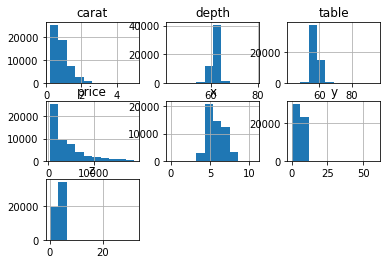

In [11]:
viz = data[['carat', 'depth', 'table', 'price', 'x','y', 'z']]

viz.hist()

In [12]:
data.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
#dropping dimensionless diamonds

data = data.drop(data[data['x']==0].index)
data = data.drop(data[data['y']==0].index)
data = data.drop(data[data['z']==0].index)

In [14]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
data.shape

(53775, 10)

In [16]:
data.describe()

,carat,depth,table,price,x,y,z
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,61.748232,57.457806,3931.220288,5.731579,5.734909,3.539964
std,0.473169,1.429639,2.233257,3985.918716,1.118611,1.139451,0.702017
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Draw a regression line to examine the data


[]

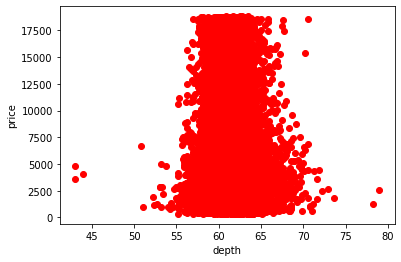

In [17]:
plt.scatter(x = data.depth, y= data.price, color ='red')
plt.xlabel("depth")
plt.ylabel("price")
plt.plot()

We have some outliers for depth greater than 75 and below 45

[]

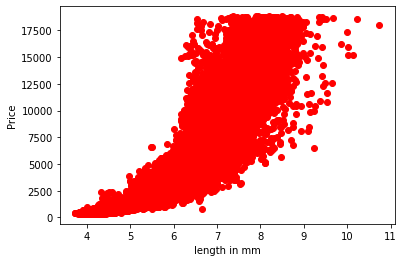

In [18]:
plt.scatter(x = data.x, y= data.price, color ='red')
plt.xlabel("length in mm")
plt.ylabel("Price")
plt.plot()

[]

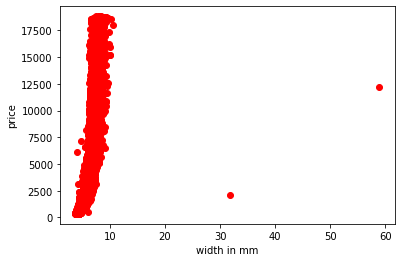

In [19]:
plt.scatter(x = data.y, y= data.price, color ='red')
plt.xlabel("width in mm")
plt.ylabel("price")
plt.plot()

In [20]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


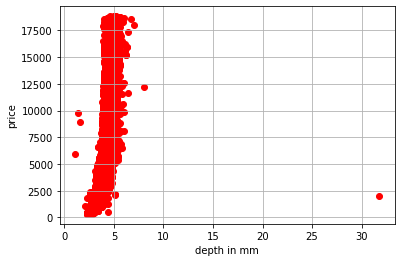

In [21]:
plt.scatter(x = data.z, y= data.price, color ='red')
plt.xlabel("depth in mm")
plt.ylabel("price")
plt.plot()
plt.grid()

an of outliers on depth greater than 30

[]

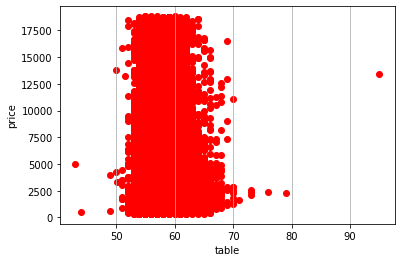

In [22]:
plt.scatter(x = data.table, y= data.price, color ='red')
plt.xlabel("table")
plt.ylabel("price")
plt.grid(axis='x')
plt.plot()

outlers on table greater than 75 and table less than 45

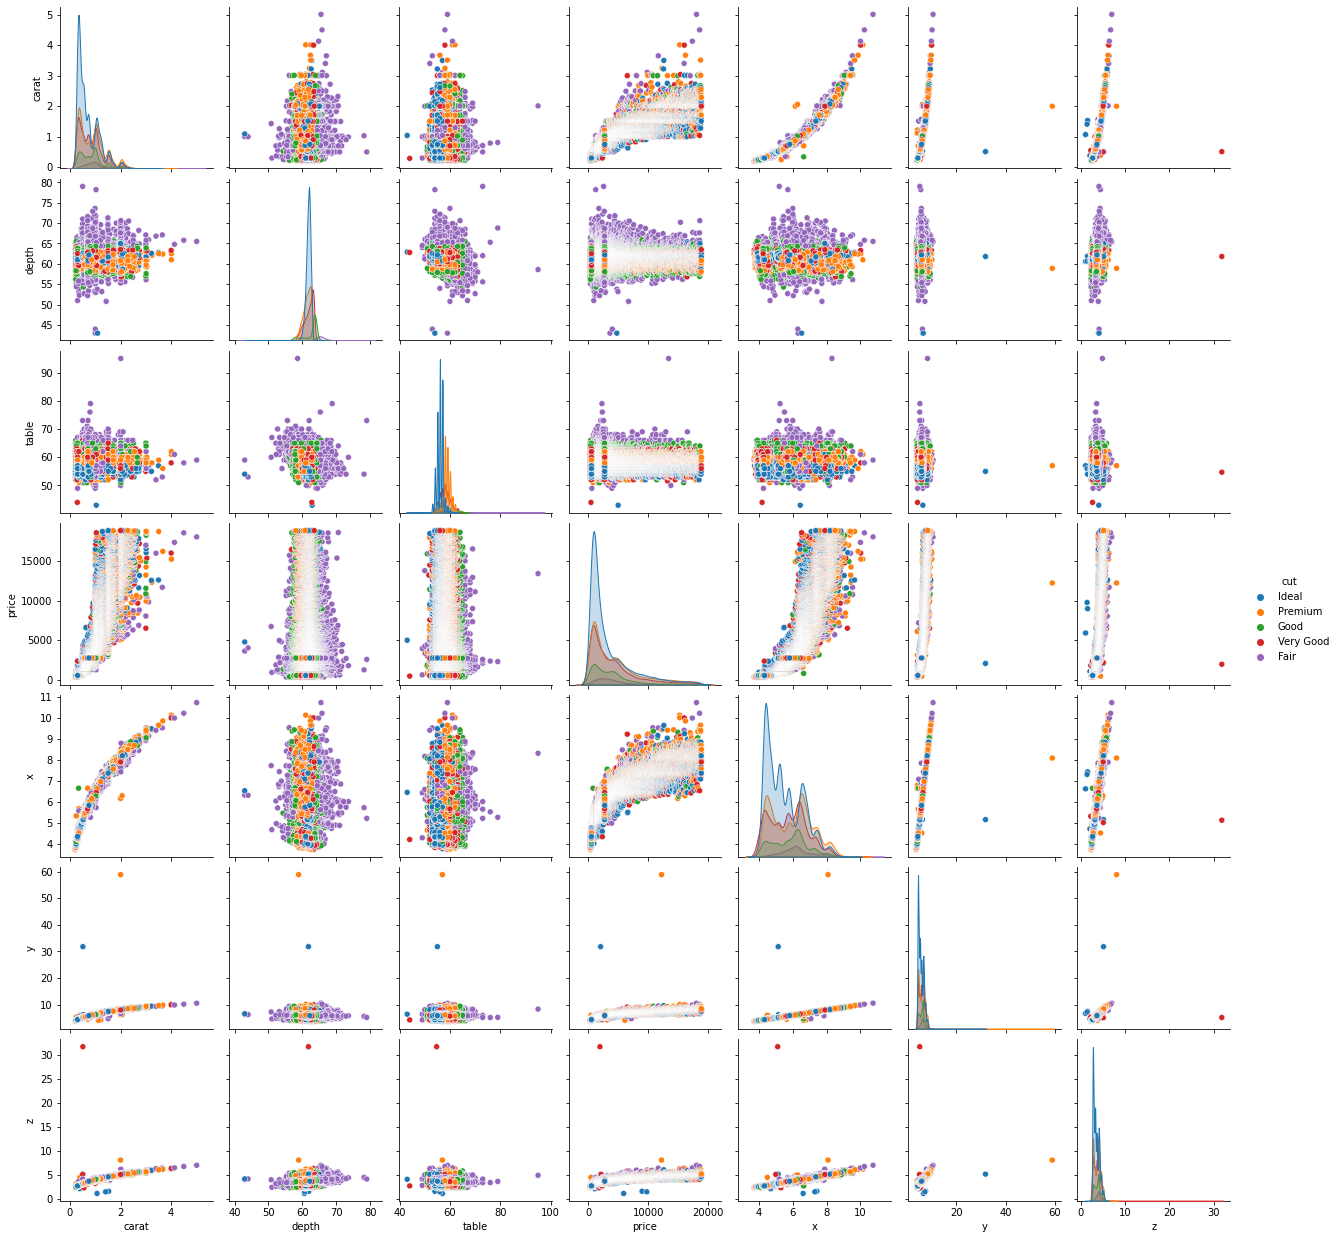

In [23]:
ax = sns.pairplot(data, hue="cut")

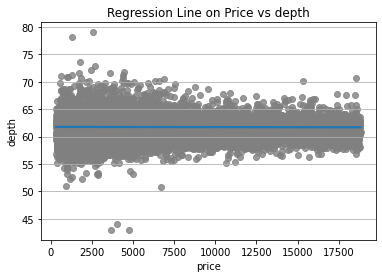

In [24]:
sns.regplot(data = data, y = 'depth', x='price', fit_reg=True, scatter_kws={"color":"grey"})
plt.title("Regression Line on Price vs depth")
plt.grid(axis='y')

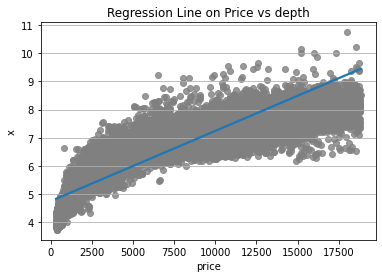

In [25]:
sns.regplot(data = data, y = 'x', x='price', fit_reg=True, scatter_kws={"color":"grey"})
plt.title("Regression Line on Price vs depth")
plt.grid(axis='y')

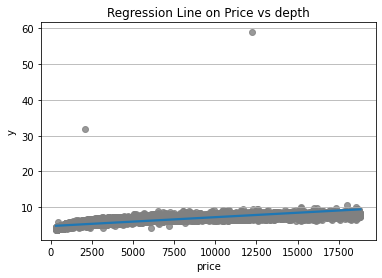

In [26]:
sns.regplot(data = data, y = 'y', x='price', fit_reg=True, scatter_kws={"color":"grey"})
plt.title("Regression Line on Price vs depth")
plt.grid(axis='y')

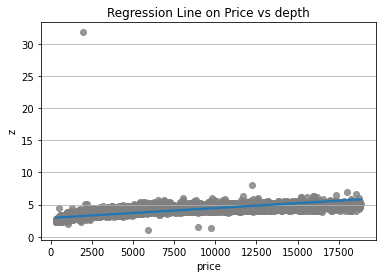

In [27]:
sns.regplot(data = data, y = 'z', x='price', fit_reg=True, scatter_kws={"color":"grey"})
plt.title("Regression Line on Price vs depth")
plt.grid(axis='y')

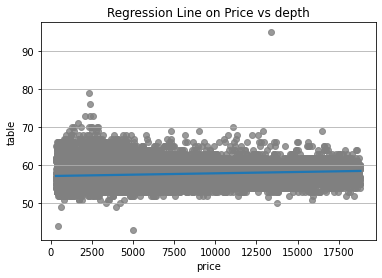

In [28]:
sns.regplot(data = data, y = 'table', x='price', fit_reg=True, scatter_kws={"color":"grey"})
plt.title("Regression Line on Price vs depth")
plt.grid(axis='y')

**Drop the outliers**

In [29]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [30]:
data.describe()

,carat,depth,table,price,x,y,z
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,61.748232,57.457806,3931.220288,5.731579,5.734909,3.539964
std,0.473169,1.429639,2.233257,3985.918716,1.118611,1.139451,0.702017
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [31]:
data[(data['depth']<75)&(data['depth']>45)]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


data = data[(data['depth']>50) & (data["depth"]<75)]
data = data[(data['x']>0) & (data["x"]<45)]
data = data[(data['y']>0) & (data["y"]<20)]
data = data[(data['z']>30) & (data["z"]<80)]

data.shape

In [32]:
#dropping the outliers

data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]

data.shape

(53763, 10)

In [33]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [34]:
s = data.dtypes=='object'
object_columns =  list(s[s].index)

print("categorical variables")
print(object_columns)

categorical variables
['cut', 'color', 'clarity']


In [35]:
list(s[s].index)

['cut', 'color', 'clarity']

Text(0.5, 0, 'Cut')

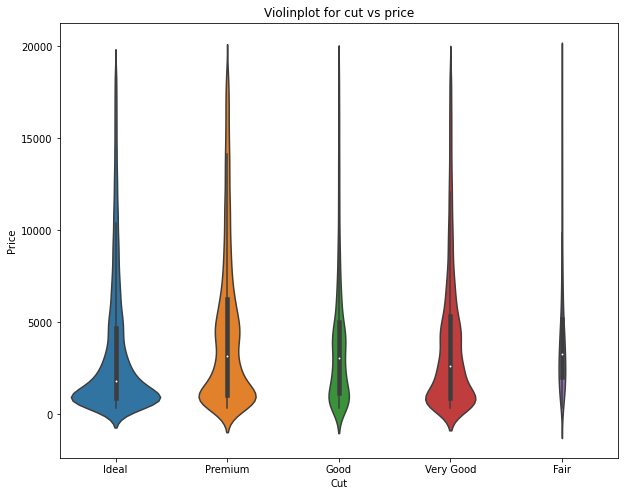

In [36]:
plt.figure(figsize=(10,8))
ax = sns.violinplot(x="cut", y="price", data=data, scale="count")
ax.set_title("Violinplot for cut vs price")
ax.set_ylabel("Price")
ax.set_xlabel("Cut")

Text(0.5, 0, 'Color')

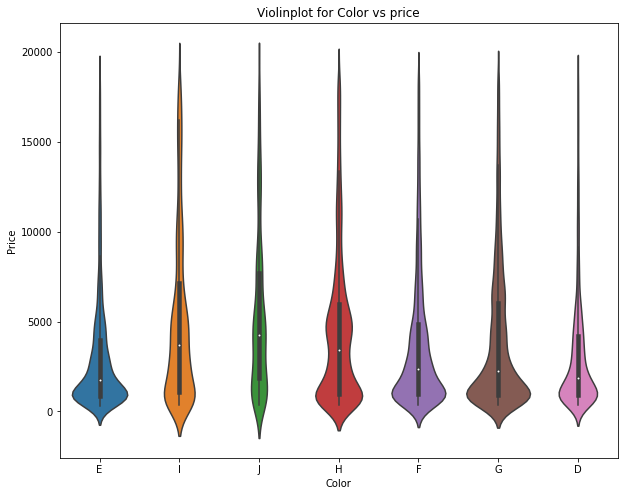

In [37]:
plt.figure(figsize=(10,8))
ax = sns.violinplot(x="color", y="price", data=data, scale="count")
ax.set_title("Violinplot for Color vs price")
ax.set_ylabel("Price")
ax.set_xlabel("Color")

Text(0.5, 0, 'Clarity')

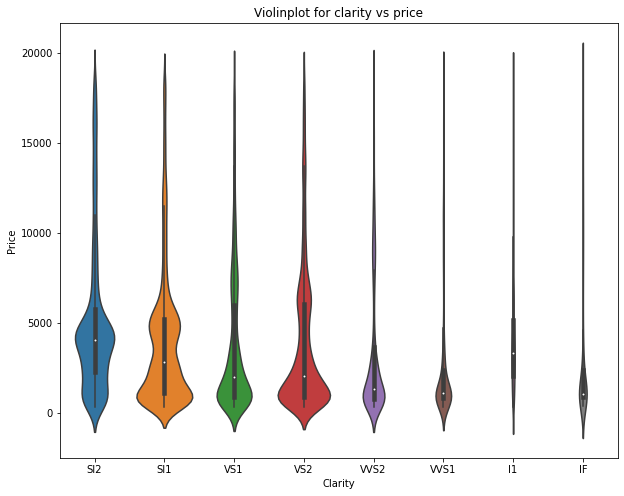

In [38]:
plt.figure(figsize=(10,8))
ax = sns.violinplot(x="clarity", y="price", data=data, scale="count")
ax.set_title("Violinplot for clarity vs price")
ax.set_ylabel("Price")
ax.set_xlabel("Clarity")

**Data Encoding**

In [46]:
data.cut.unique()
data.color.unique()
data.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [57]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [58]:
#copy the dataset

label_data = data.copy()

#apply label encoder to each column with categorical data

encoder = LabelEncoder()

for column in object_columns:
    label_data[column] = encoder.fit_transform(label_data[column].astype("str"))
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [59]:
data.describe()

,carat,depth,table,price,x,y,z
count,53763.000000,53763.000000,53763.000000,53763.000000,53763.000000,53763.000000,53763.000000
mean,0.797460,61.748781,57.457207,3930.785336,5.731405,5.733299,3.539367
std,0.473136,1.419309,2.226311,3985.807738,1.118563,1.110473,0.690879
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


**Correlation Matrix**

In [60]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028718,0.181098,0.921546,0.977855,0.976940,0.977069
depth,0.028718,1.000000,-0.301988,-0.010766,-0.024679,-0.027810,0.097230
table,0.181098,-0.301988,1.000000,0.126425,0.195530,0.189325,0.154900
price,0.921546,-0.010766,0.126425,1.000000,0.887118,0.888708,0.882504
x,0.977855,-0.024679,0.195530,0.887118,1.000000,0.998654,0.991666
y,0.976940,-0.027810,0.189325,0.888708,0.998654,1.000000,0.991330
z,0.977069,0.097230,0.154900,0.882504,0.991666,0.991330,1.000000


<AxesSubplot:>

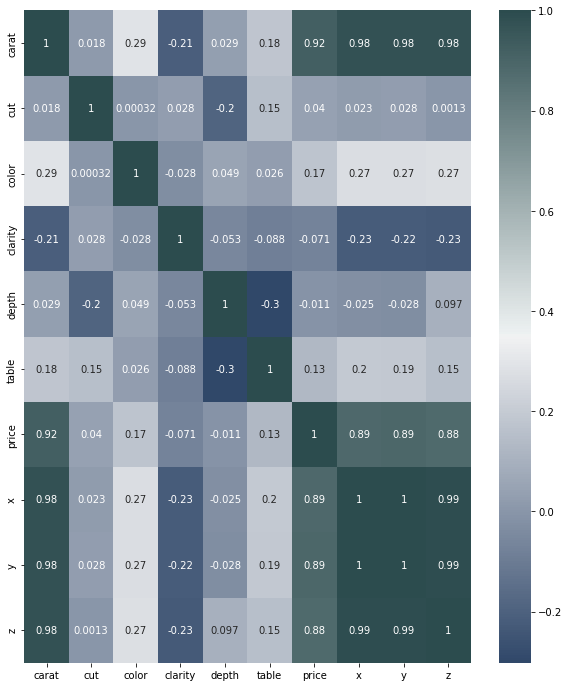

In [73]:
cmap =  sns.diverging_palette(250,200,s=60,l=30, as_cmap=True)
cormat = label_data.corr()
ax = plt.subplots(figsize = (10,12))
sns.heatmap(cormat, cmap=cmap, annot=True)

**Observations**

- There is a high correlation between price and x, y, and z which corresponds to the length, width and depth of the diamond.

That goes to say that the size of the diamond determines the price.

- carat is highly correlated with price also.

- depth, cut, table show a low correlation


Drop columns "depth", "cut", "table"

<h2>Prepared Data</h2>

In [74]:
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


The data has been cleaned and explored here. 

Hence, this data will be saved and various steps would be explored in building models

In [75]:
data.to_csv("clean-data.csv")